<a href="https://colab.research.google.com/github/Ochan-LOKIDORMOI/Data_preprocessing/blob/main/ml_pipeline_Ochan_LOKIDORMOI_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Processing Approach for Portfolio Project**

## Project Title: **Animals Classification Model**
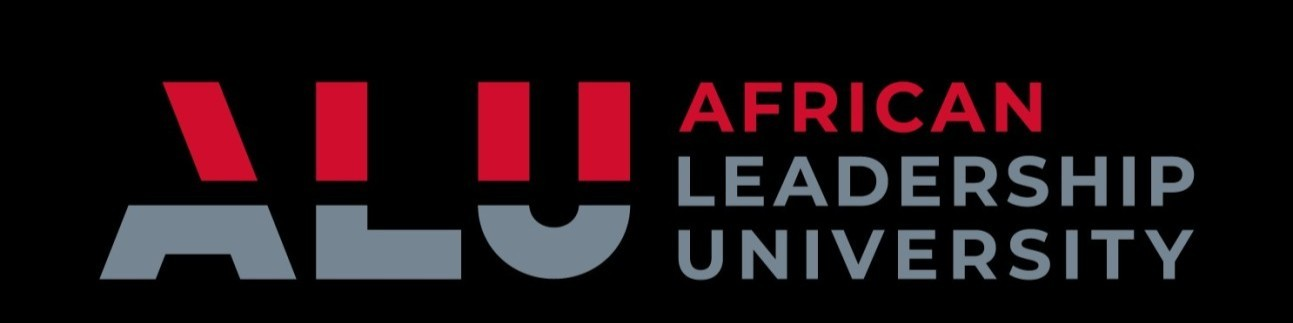

## Student Name: **Ochan Denmark LOKIDORMOI**

---

1. **Data Sources and Aggregation:**
   - List all sources of data for the project. **You must consider sources outside kaggle, google datasets** (insert links where necessary to online platforms,research papers etc)
  - The primary dataset for this project is animal classification. It has three categories i.e domestic, wild and human.
  - The whole idea is to build a machine learning model that will recognize the animal either it is a domestic, wild or human.
  
    https://www.kaggle.com/datasets/borhanitrash/animal-image-classification-dataset/code

    https://www.kaggle.com/code/nimapourmoradi/animal-detection

    - Additional dataset is from the research African Parks conducted on the largest animals migration in the world
    https://www.africanparks.org/worlds-largest-land-mammal-migration-confirmed-south-sudan#:~:text=To%20access%20media%20assets%2C%20please%20click

   
   - Determine if data aggregation from multiple sources is necessary for comprehensive analysis.
   - In this project, this dataset is sufficient, it contains about 1,188 images of various animals so there's no need to aggregate them or add more images for nownow.



In [2]:
path = "/content/drive/MyDrive/animal"

Folder: wild


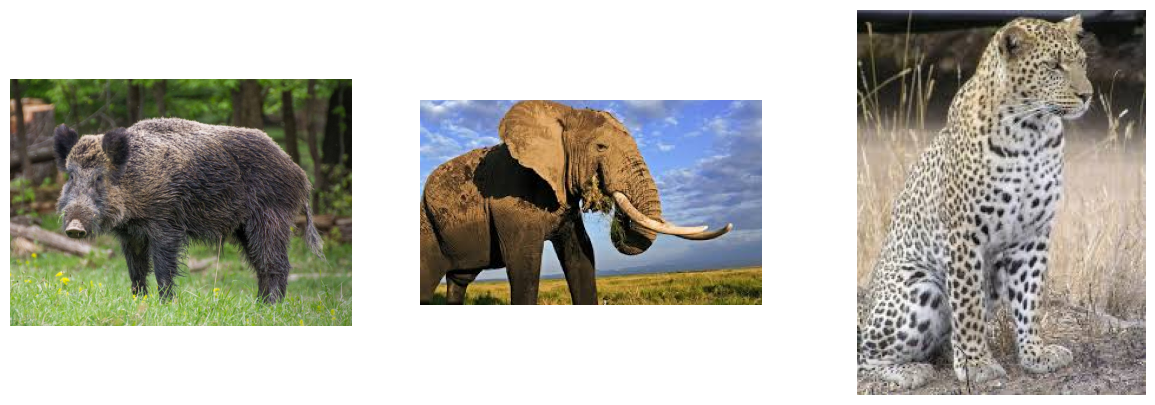

Folder: domestic


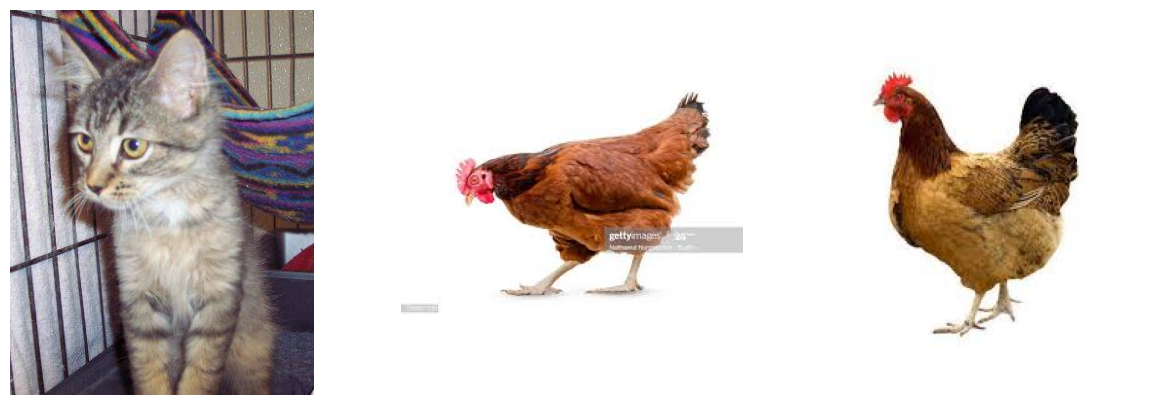

Folder: Human


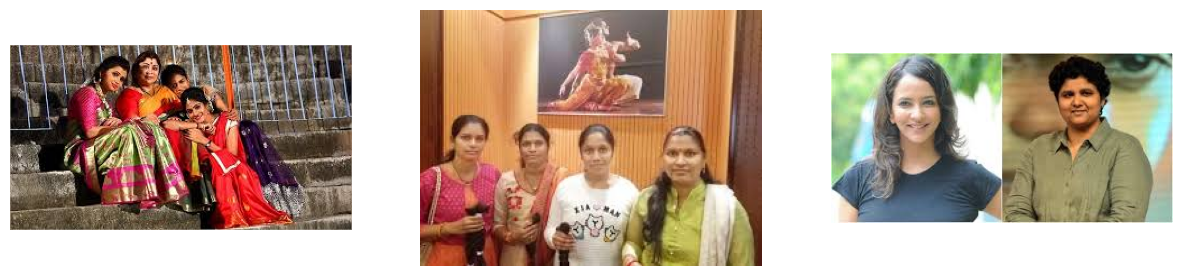

In [5]:
#Displaying the animals in each category
import os
import matplotlib.pyplot as plt
from PIL import Image

def display_images_horizontally(folder_path, num_images=3):
  """Displays images horizontally from a given folder."""

  image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
  if not image_files:
    print(f"No image files found in {folder_path}")
    return

  images_to_display = image_files[:num_images]

  plt.figure(figsize=(15, 5))
  for i, image_file in enumerate(images_to_display):
      image_path = os.path.join(folder_path, image_file)
      try:
          img = Image.open(image_path)
          plt.subplot(1, num_images, i + 1)
          plt.imshow(img)
          plt.axis('off')
      except Exception as e:
          print(f"Error opening image {image_file}: {e}")
  plt.show()

for folder_name in os.listdir(path):
    folder_path = os.path.join(path, folder_name)
    if os.path.isdir(folder_path):
        print(f"Folder: {folder_name}")
        display_images_horizontally(folder_path)




2. **Data Format Transformation:**
   - Describe the current format of the data.
   - Outline the planned transformation to a unified format suitable for analysis and modeling.

 **Current Format:**
- Images are in .jpg formats stored in class-specific folders that is to say Wild, Domestic and Humans.

  **Planned Transformation:**

- Convert images into tensors or arrays for modeling using TensorFlow or pytorch
- Standardize image sizes to 224×24 pixels to maintain consistency.



# **Transformed and Resized Images**


Folder: wild


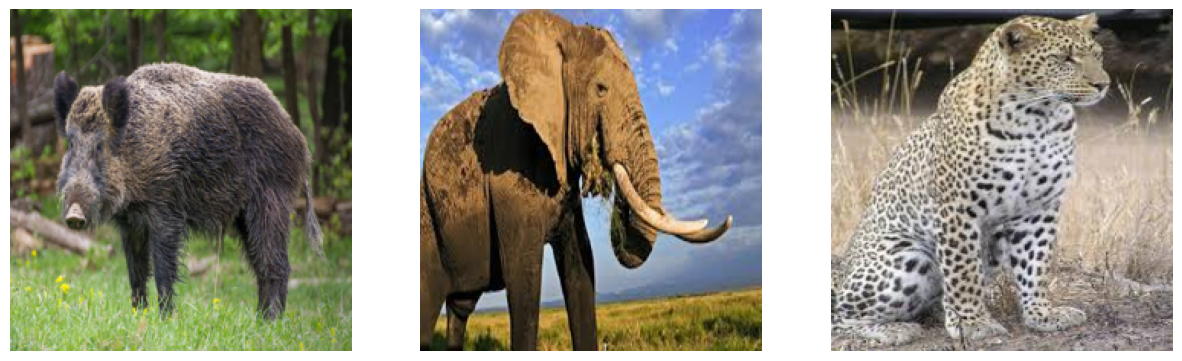


Folder: domestic


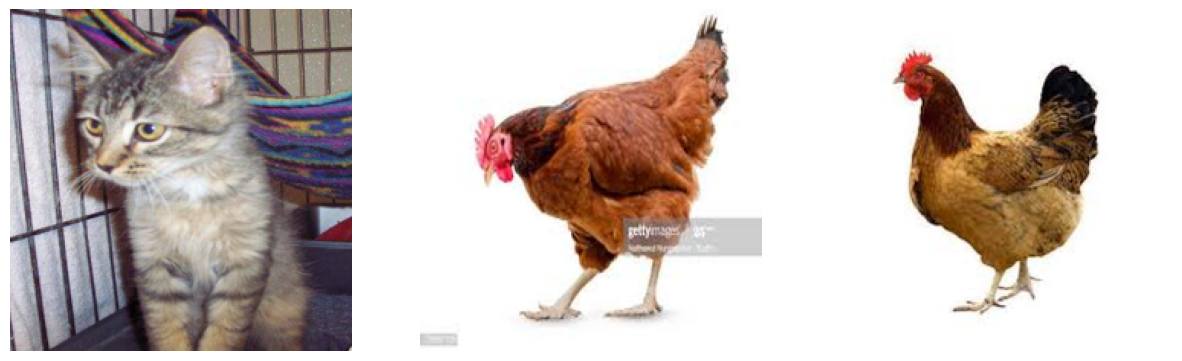


Folder: Human


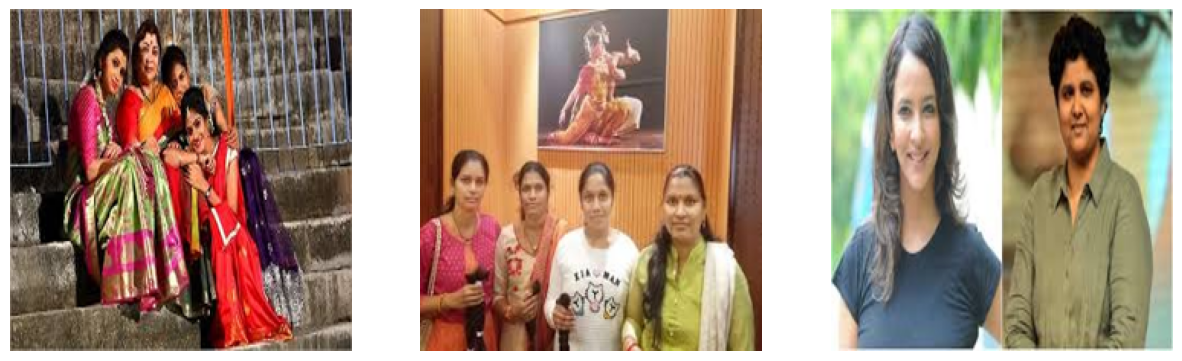

In [8]:
from PIL import Image
import numpy as np

def transform_images(folder_path, target_size=(224, 224)):
  """Transforms images in a folder to a uniform size."""
  transformed_images = []
  for filename in os.listdir(folder_path):
      image_path = os.path.join(folder_path, filename)
      if os.path.isfile(image_path) and image_path.lower().endswith(('.png', '.jpg', '.jpeg')):
          try:
              img = Image.open(image_path)
              img = img.resize(target_size)
              img_array = np.array(img)
              transformed_images.append(img_array)
          except Exception as e:
              print(f"Error processing {filename}: {e}")

  return transformed_images


for folder_name in os.listdir(path):
  folder_path = os.path.join(path, folder_name)
  if os.path.isdir(folder_path):
      print(f"\nFolder: {folder_name}")
      transformed_imgs = transform_images(folder_path)

      if transformed_imgs:
          plt.figure(figsize=(15, 5))
          for i in range(min(3, len(transformed_imgs))):
              plt.subplot(1, 3, i + 1)
              plt.imshow(transformed_imgs[i])
              plt.axis('off')
          plt.show()

3. **Data Exploration:**
   - Enumerate the features included in the dataset.
   
   - Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.
   
  
**Features:**

The dataset consists of image files organized into folders based on animal categories (Wild, Domestic, Humans).  Each image is considered a data point, with the following key features:

* **Image Pixel Data:** This is the raw representation of the image, forming the basis of our analysis. It includes color information for each pixel.
* **Image Category (Label):** The folder in which the image resides serves as a label, indicating whether the animal belongs to the "Wild," "Domestic," or "Humans" category.

**Exploratory Data Analysis (EDA) Summary:**

* **Distributions:**
    * We can visually inspect the image distributions across categories to understand the class balance.
    * We might also analyze pixel-level distributions (e.g., average RGB values) for each class, potentially revealing differences in lighting or color patterns that distinguish the animal types.
* **Correlations:**
    * While correlation is less straightforward with image data, we could consider potential correlations between certain image features and the class label. For example, certain image features (e.g., texture or shape) might be more strongly associated with specific categories.

**Possible EDA Findings:**

* **Class Imbalance:** We might find that the number of images in each class is not equal, potentially leading to biased model training.
* **Visual Patterns:** Some categories might exhibit distinct visual patterns. For instance, wild animals might be more likely to appear in natural environments, while domestic animals might be more commonly found in indoor settings. Analyzing dominant colors, textures, and shapes within each class could reveal characteristic features.
* **Image Quality:** We might observe images with varying levels of clarity, brightness, and contrast. These issues could impact model performance and might require pre-processing steps like image enhancement or noise reduction.
* **Presence of Extraneous Elements:** Images may contain background elements that are not relevant to the primary animal classification task. We might need to explore ways to isolate or remove these elements to improve the accuracy of the models.





In [10]:
#  Distributions
import pandas as pd

image_paths = []
labels = []
for folder_name in os.listdir(path):
  folder_path = os.path.join(path, folder_name)
  if os.path.isdir(folder_path):
    for filename in os.listdir(folder_path):
      image_path = os.path.join(folder_path, filename)
      if os.path.isfile(image_path) and image_path.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_paths.append(image_path)
        labels.append(folder_name)

# DataFrame for EDA
df = pd.DataFrame({'image_path': image_paths, 'label': labels})

# 1. Distributions
print("Distribution of images across categories:")
print(df['label'].value_counts())


Distribution of images across categories:
label
Human       442
wild        393
domestic    349
Name: count, dtype: int64


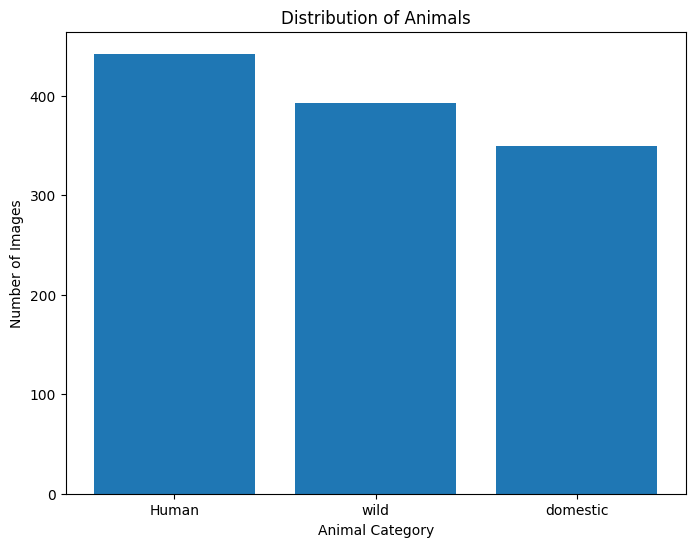

In [16]:
import matplotlib.pyplot as plt

# Distribution of each Animal
label_counts = df['label'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel("Animal Category")
plt.ylabel("Number of Images")
plt.title("Distribution of Animals")
plt.show()



4. **Hypothesis Testing:**
   - State any preexisting hypotheses about the data.
   - Explain methodologies to empirically test these hypotheses.

   

**Preexisting Hypotheses:**

1. **Distinctive Visual Features:** There are significant differences in the visual features (e.g., color patterns, textures, shapes) between the three animal categories (Wild, Domestic, Humans).
2. **Class Separability:** The different animal categories are visually separable, and machine learning models can be trained to accurately classify images into these categories with high accuracy.
3. **Impact of Image Quality:**  Images with higher quality (e.g., clearer, sharper, well-lit) will contribute to higher classification accuracy compared to lower-quality images.

**Methodologies to Test These Hypotheses:**

1. **Hypothesis 1 (Distinctive Visual Features):**
- **Methodology:**

   Conducting a comparative analysis of image features extracted from the different categories using techniques like feature extraction e.g. CNN feature maps.
- **Visual Inspection:**
   
   Manually inspect images in each category to identify visually prominent features that distinguish them.
   
  This could involve identifying characteristic patterns, colors, or shapes specific to each class.


2. **Hypothesis 2 (Class Separability):**
- **Methodology:**
  
   Train a machine learning model (e.g., convolutional neural network) to classify the images into their respective categories.
- **Evaluation Metrics:**
   
   Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1-score.  
- **Comparison to Baseline:**
   
   Compare the model's performance against a baseline, such as random guessing or a simpler model.  A significantly better performance than the baseline would support the hypothesis.


3. **Hypothesis 3 (Impact of Image Quality):**
- **Methodology:**
  
   Developing a method to quantify image quality (e.g., sharpness, contrast, brightness).
- **Regression Analysis:**
   
   Building a regression model to predict classification accuracy based on image quality.
- **Subgroup Analysis:**
   
   Compare the classification accuracy for different subsets of the data, based on their respective image quality levels (e.g., high-quality vs. low-quality).
    


5. **Handling Sparse/Dense Data and Outliers:**
   - Assess the density of the data.
   - Propose strategies to handle missing data and outliers while maintaining dataset integrity.

   **Insert code for Handling Sparse/Dense Data and Outliers below**

In [18]:
# Assess Data Density (for image data, this might involve checking for missing images or empty files)
print("Number of Images:", len(df))
print("Number of Images per Category:")
print(df['label'].value_counts())

# Check if there are any missing image paths or labels.
print("Missing Image Paths:", df['image_path'].isnull().sum())
print("Missing Labels:", df['label'].isnull().sum())


# 1. Pixel-level outlier detection:
def detect_outliers_by_pixel_intensity(image_paths):
  outliers = []
  for image_path in image_paths:
    try:
      img = Image.open(image_path)
      img_array = np.array(img)
      mean_intensity = np.mean(img_array)
      std_intensity = np.std(img_array)

      if mean_intensity > 150 or std_intensity > 50:
          outliers.append(image_path)
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
  return outliers

# After handling missing data and outliers, re-check the data density.
print("Number of Images After Processing:", len(df))
print("Number of Images per Category After Processing:")
print(df['label'].value_counts())

Number of Images: 1184
Number of Images per Category:
label
Human       442
wild        393
domestic    349
Name: count, dtype: int64
Missing Image Paths: 0
Missing Labels: 0
Number of Images After Processing: 1184
Number of Images per Category After Processing:
label
Human       442
wild        393
domestic    349
Name: count, dtype: int64


6. **Data Splitting:**
   - Define a methodology to split the dataset into training, validation, and testing sets.
   - Ensure randomness and representativeness in each subset.

   **The dataset is split into training, validation, and test sets using train_test_split. The training set contains 70%, the validation set 10%, and the test set 20% of the data. This ensures randomness and balanced representation of all image classes in each folder.**

7. **Bias Mitigation:**
   - Implement techniques to identify and mitigate biases in the dataset.
   - Ensure fairness and equity in data representation.
   
- Balanced diversity within the wild, domestic and Human categories by including different species and breeds.




In [19]:
from sklearn.model_selection import train_test_split

# image_paths and labels
train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42, stratify=labels
)

val_paths, test_paths, val_labels, test_labels = train_test_split(
    test_paths, test_labels, test_size=0.5, random_state=42, stratify=test_labels
)

print("Training set size:", len(train_paths))
print("Validation set size:", len(val_paths))
print("Test set size:", len(test_paths))

Training set size: 947
Validation set size: 118
Test set size: 119


8. **Features for Model Training:**
   - Identify relevant features for training the model.
   - Rank features based on their significance to project objectives.

**1. Image Pixel Data:** This is the core feature representing the raw visual information of each image. The model learns patterns and characteristics from the pixel data to differentiate between animal categories.

**2. Image Category (Label):** This feature provides the ground truth for training the model. The model learns to associate pixel data with corresponding categories (Wild, Domestic, Humans).

**3. Image Size:** A standardized image size ensures consistency during model training. It is important to pre-process images to a uniform size before model training.
   - **Importance:** Contributes to efficient model training and preventing issues caused by inconsistent input sizes.

9. **Types of Data Handling:**
   - Classify the types of data (categorical, numerical, etc.) present in the dataset.
   - Plan preprocessing steps for each data type.

# 1. Categorical Data:
 - Image Category (Label): "Wild", "Domestic", "Humans"

# Preprocessing Steps:

- **Label Encoding:** Convert the categorical labels into numerical representations (e.g., 0 for "Wild", 1 for "Domestic", 2 for "Humans"). This allows the model to process the labels effectively.

- **One-Hot Encoding:**  Optionally, use one-hot encoding to represent each category as a binary vector, ensuring that the model does not assign any inherent order or numerical value to the categories.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the labels
encoded_labels = label_encoder.fit_transform(labels)

# Print the encoded labels
print(encoded_labels)
label_mapping = dict(zip(encoded_labels, labels))



10. **Data Transformation for Modeling:**
    - Specify methods for transforming raw data into a model-friendly format.
    - Detail steps for normalization, scaling, or encoding categorical variables.
    
  **Steps**
  - Resizing and normalizing images.
  - Applying augmentations dynamically during training.
  - Encode labels using one-hot encoding.

11. **Data Storage:**
    - Determine where and how processed data will be stored.
    - Choose suitable storage solutions ensuring accessibility and security.


- The processed image data (e.g., resized, normalized images) can be stored in memory as NumPy arrays. This ensures efficient manipulation and feeding into the model.
- After training the model, it be saved to disk in a suitable format, such as .h5 or .keras. This ensures that the trained model can be easily reloaded for evaluation or deployment.

**For Accessibility and Security:**
- I used a cloud storage solution **Google Drive** for backups and  sharing the processed data and trained model.
---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.